In [ ]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf



In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
hf=h5py.File('/content/gdrive/My Drive/Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [ ]:
hf

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>

In [ ]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
x_train=hf['X_train'][:]
y_train=hf['y_train'][:]
x_test=hf['X_test'][:]
y_test=hf['y_test'][:]
x_val=hf['X_val'][:]
y_val=hf['y_val'][:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)


(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


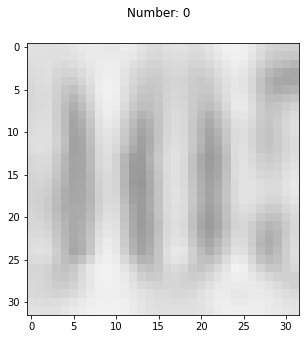

In [ ]:

plt.figure(figsize=(5,5))
plt.imshow(x_val[40000],cmap='Greys',vmin=0,vmax=255)
plt.suptitle('Number: ' + str(y_val[40000]))
plt.show()

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [ ]:
y_train[1000]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
model.output

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'batch_normalization')>

In [ ]:
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization()) 

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) 

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_4')>

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 500)               512500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10,restore_best_weights=True,mode='min')
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('./checkpoint', monitor='val_loss',save_best_only=True,save_freq='epoch')
history=model.fit(x_train,y_train,          
          validation_data=(x_val,y_val),
          epochs=200,
          batch_size=100,callbacks=[callback, checkpoint_cb])

Epoch 1/200
420/420 [==============================] - 11s 24ms/step - loss: 2.3966 - accuracy: 0.1551 - val_loss: 1.4536 - val_accuracy: 0.5186
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/200
420/420 [==============================] - 10s 23ms/step - loss: 1.6505 - accuracy: 0.4186 - val_loss: 1.1083 - val_accuracy: 0.6477
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 3/200
420/420 [==============================] - 10s 23ms/step - loss: 1.3815 - accuracy: 0.5414 - val_loss: 0.9617 - val_accuracy: 0.7036
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 4/200
420/420 [==============================] - 10s 23ms/step - loss: 1.2261 - accuracy: 0.6063 - val_loss: 0.8477 - val_accuracy: 0.7427
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 5/200
420/420 [==============================] - 10s 24ms/step - loss: 1.1152 - accuracy: 0.6457 - val_loss: 0.7569 - val_accuracy: 0.7727
INFO:tensorflow:Assets written to: ./checkpoint/assets


In [ ]:
model.save("/content/gdrive/My Drive/my_keras_model.h5")

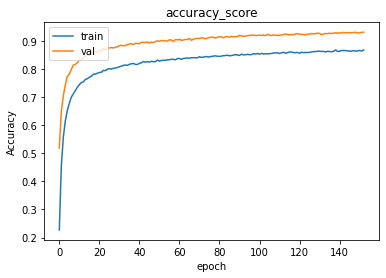

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy_score')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

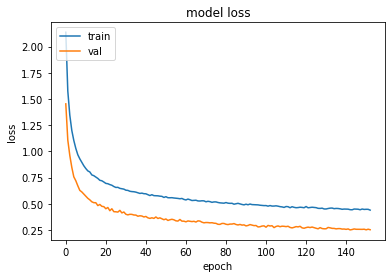

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=32)
print("Test loss, Test acc:", results)

Evaluate on test data
563/563 [==============================] - 2s 3ms/step - loss: 0.3791 - accuracy: 0.8893
Test loss, Test acc: [0.37912696599960327, 0.8893333077430725]


In [ ]:
x_new = x_test[1:4]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],
      dtype=float32)

In [ ]:
y_test[1:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)